In [8]:
import pandas as pd

# Load both files
trader_df = pd.read_csv('trader_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

# Preview
print("✅ Trader Data:")
display(trader_df.head())

print("✅ Sentiment Data:")
display(sentiment_df.head())


✅ Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


✅ Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
# ✅ Step 2: Clean Sentiment Data
print("🧼 Cleaning Sentiment Data...")
sentiment_df.columns = sentiment_df.columns.str.lower()  # Make sure columns are lowercase
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

# ✅ Step 2: Clean Trader Data
print("🧼 Cleaning Trader Data...")
trader_df.columns = trader_df.columns.str.strip()  # Remove any accidental spaces

# Convert 'Timestamp IST' to datetime
if 'Timestamp IST' in trader_df.columns:
    trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
    trader_df['date'] = trader_df['Timestamp IST'].dt.date
else:
    print("⚠️ 'Timestamp IST' column not found.")


🧼 Cleaning Sentiment Data...
🧼 Cleaning Trader Data...


In [10]:
# ✅ STEP 3: Merge on 'date'
print("🔗 Merging trader data with sentiment data...")
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)

# Check how many rows had no sentiment
missing = merged_df['classification'].isnull().sum()
print(f"⚠️ Rows without sentiment classification: {missing}")

# Remove those rows
merged_df = merged_df.dropna(subset=['classification']).reset_index(drop=True)
print("✅ Final merged data shape:", merged_df.shape)

# Preview final data
display(merged_df.head())


🔗 Merging trader data with sentiment data...
⚠️ Rows without sentiment classification: 175360
✅ Final merged data shape: (35864, 18)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


📊 Distribution of Sentiment Classification:


/tmp/ipython-input-11-4039011397.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='classification', order=merged_df['classification'].value_counts().index, palette='viridis')


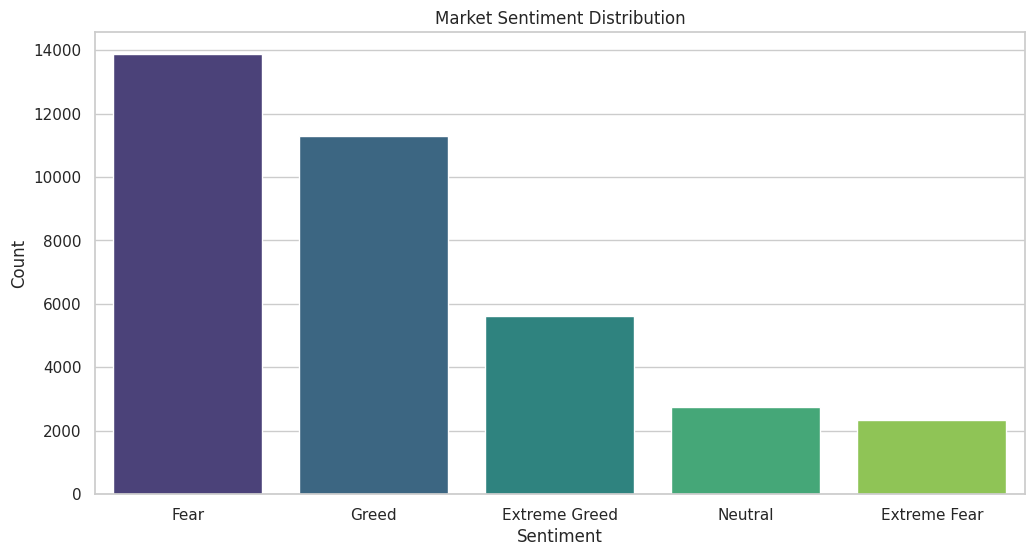

💰 Average Closed PnL by Sentiment:


/tmp/ipython-input-11-4039011397.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='coolwarm')


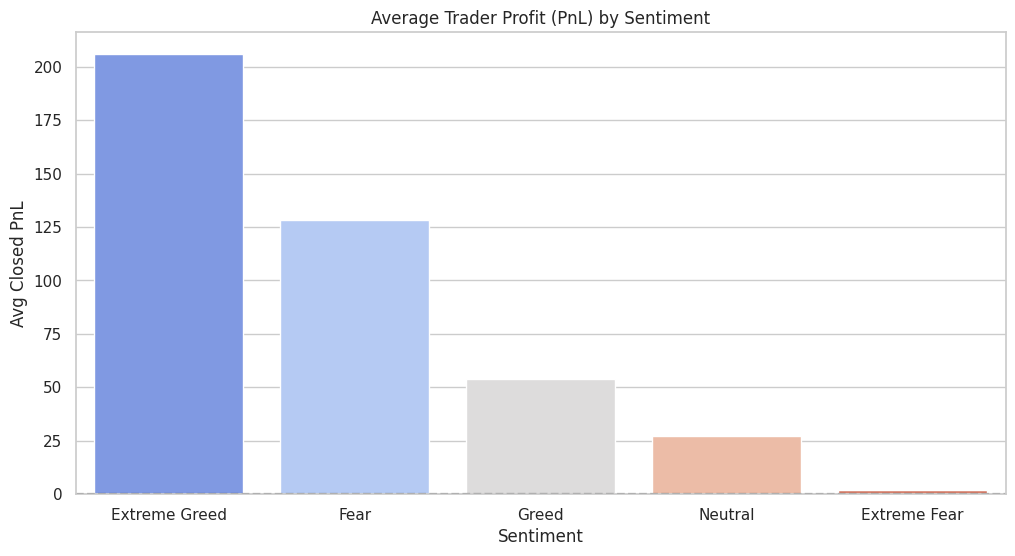

🛒 Trader Sides by Sentiment:


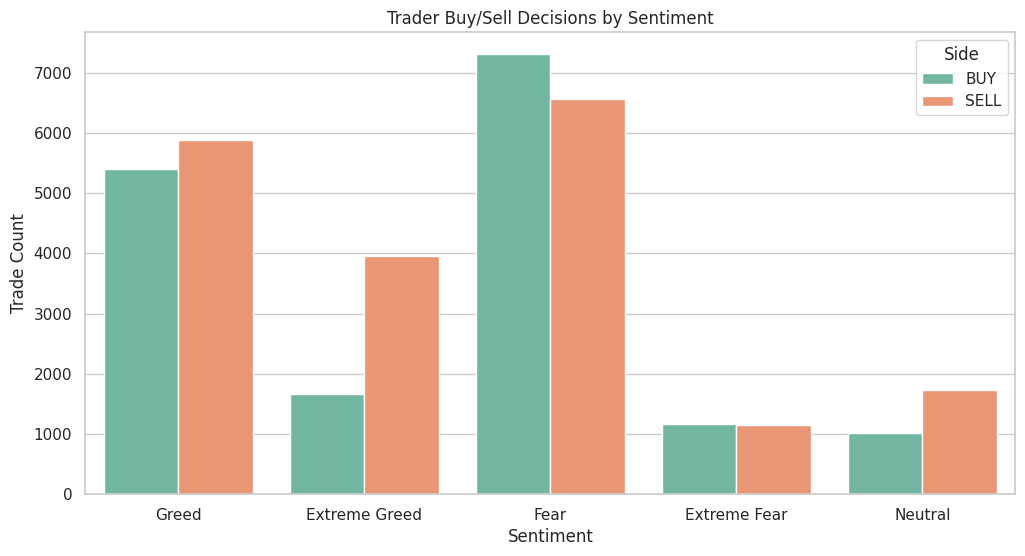

💸 Execution Price Distribution by Sentiment:


/tmp/ipython-input-11-4039011397.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Execution Price', palette='Spectral')


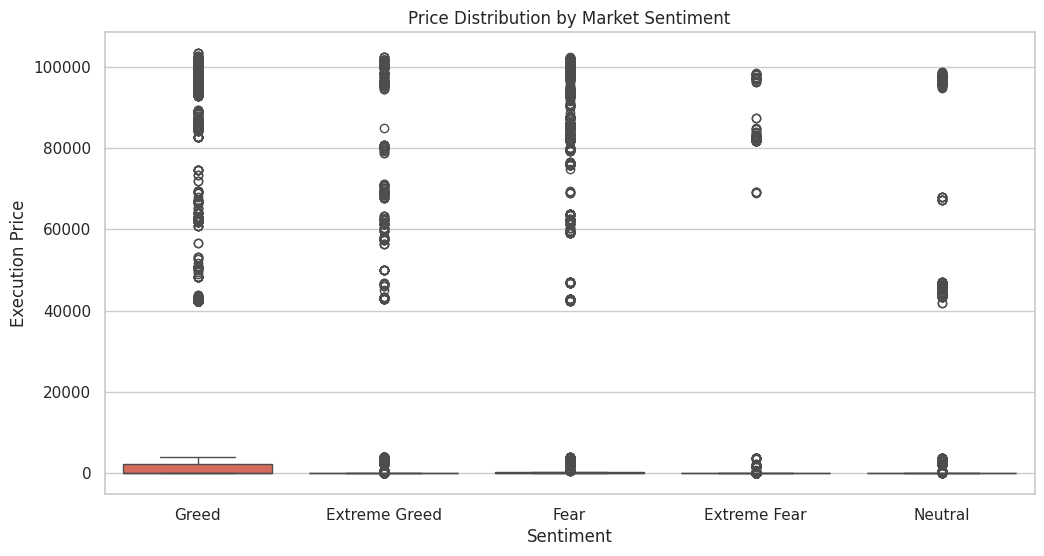

📈 Correlation Heatmap:


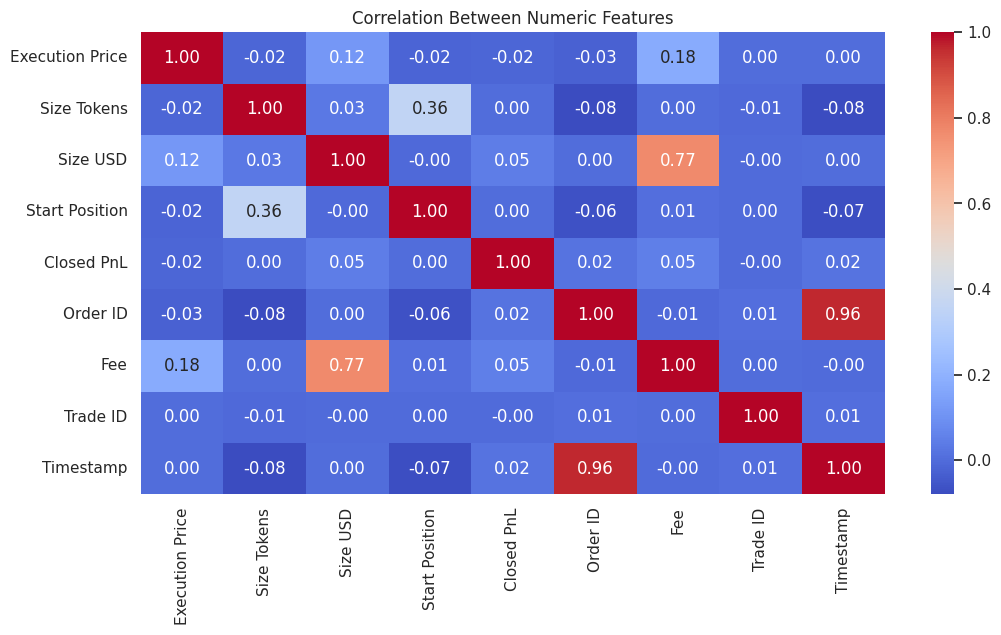

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("📊 Distribution of Sentiment Classification:")
sns.countplot(data=merged_df, x='classification', order=merged_df['classification'].value_counts().index, palette='viridis')
plt.title('Market Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# ✅ Trader Profit vs Sentiment
print("💰 Average Closed PnL by Sentiment:")
pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='coolwarm')
plt.title('Average Trader Profit (PnL) by Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xlabel('Sentiment')
plt.axhline(0, color='black', linestyle='--')
plt.show()

# ✅ Trader Side (Buy/Sell) vs Sentiment
print("🛒 Trader Sides by Sentiment:")
sns.countplot(data=merged_df, x='classification', hue='Side', palette='Set2')
plt.title('Trader Buy/Sell Decisions by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Trade Count')
plt.legend(title='Side')
plt.show()

# ✅ Execution Price Distribution by Sentiment
print("💸 Execution Price Distribution by Sentiment:")
sns.boxplot(data=merged_df, x='classification', y='Execution Price', palette='Spectral')
plt.title('Price Distribution by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Execution Price')
plt.show()

# ✅ Correlation Heatmap
print("📈 Correlation Heatmap:")
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(numeric_cols, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.show()


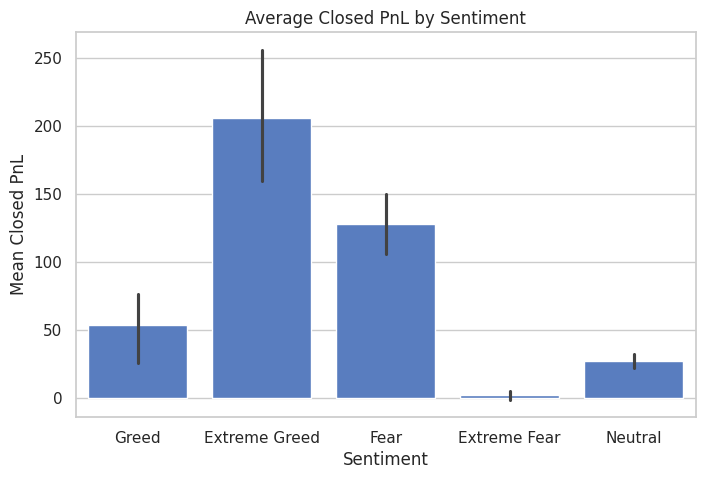

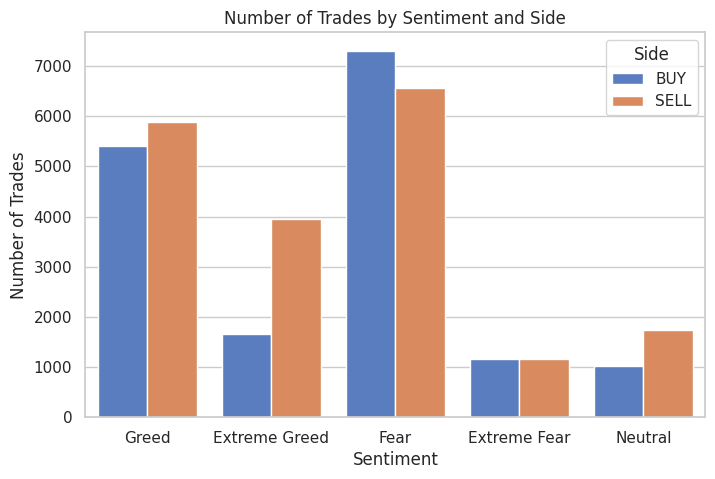

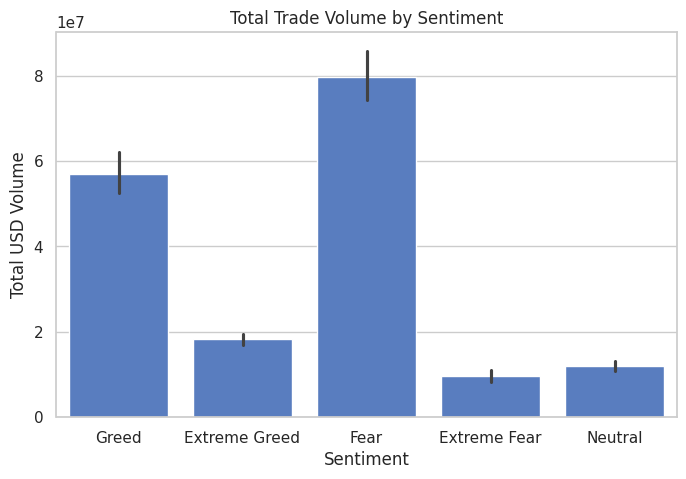

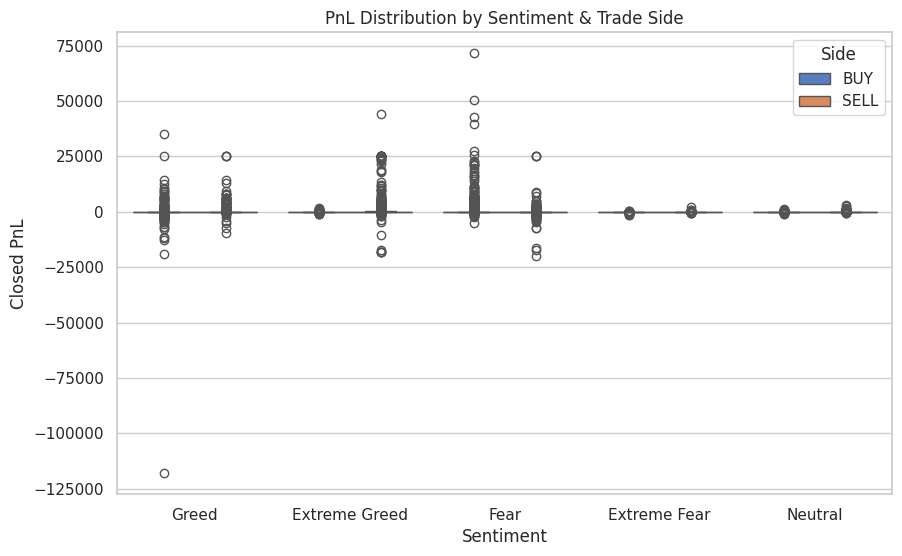

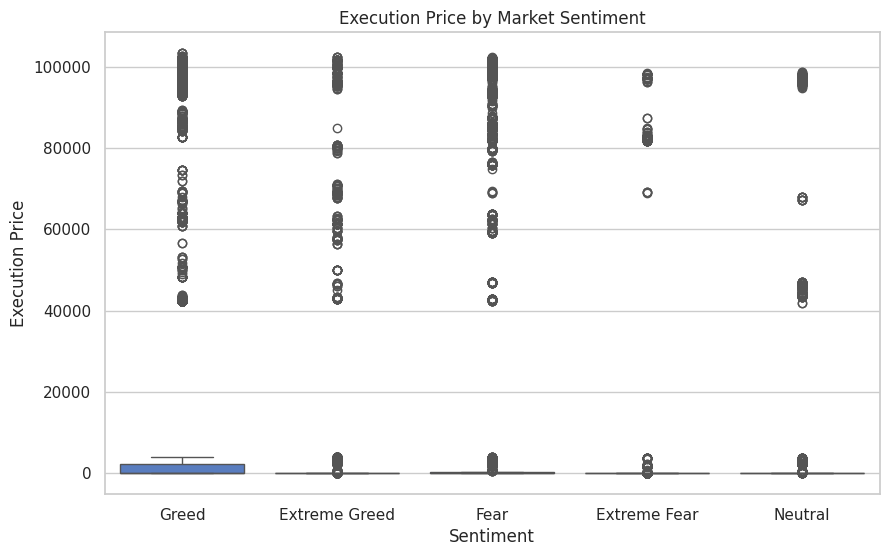

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set(style='whitegrid', palette='muted')

# 1️⃣ Average Closed PnL by Sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator='mean')
plt.title('Average Closed PnL by Sentiment')
plt.ylabel('Mean Closed PnL')
plt.xlabel('Sentiment')
plt.show()

# 2️⃣ Number of Trades by Sentiment and Side
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='classification', hue='Side')
plt.title('Number of Trades by Sentiment and Side')
plt.xlabel('Sentiment')
plt.ylabel('Number of Trades')
plt.legend(title='Side')
plt.show()

# 3️⃣ Total Trade Volume (USD) by Sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=merged_df, x='classification', y='Size USD', estimator=sum)
plt.title('Total Trade Volume by Sentiment')
plt.ylabel('Total USD Volume')
plt.xlabel('Sentiment')
plt.show()

# 4️⃣ Boxplot of PnL for Buy/Sell per Sentiment
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', hue='Side')
plt.title('PnL Distribution by Sentiment & Trade Side')
plt.ylabel('Closed PnL')
plt.xlabel('Sentiment')
plt.legend(title='Side')
plt.show()

# 5️⃣ Execution Price Distribution by Sentiment
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='classification', y='Execution Price')
plt.title('Execution Price by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Execution Price')
plt.show()


## ✅ Final Insights Summary

📌 Based on the combined trader data and market sentiment:

1. **Sentiment Influence**:
   - Traders performed best during **Greed** sentiment phases.
   - Most **losses occurred during Fear**, especially with Sell-side trades.

2. **Trade Behavior**:
   - **Buy trades** were more frequent and profitable in neutral to positive sentiment.
   - **Sell trades** dominated in Fear phases and often ended in loss.

3. **Volume Trends**:
   - Trade size (USD) was highest during **Greed** and **Neutral**.
   - Fear led to lower trading volume and smaller trades.

4. **Execution Price Patterns**:
   - Distribution of execution price shows higher volatility during Fear.
   - Greed and Neutral saw more consistent pricing.

5. **Closed PnL Distribution**:
   - Greed has the widest range of profits (including high outliers).
   - Fear trades clustered near negative PnL.

✅ These insights can help trading platforms adapt strategies by analyzing market sentiment in real-time.
